In [5]:
import numpy as np
from DistantSpeech.transform.transform import Transform
from DistantSpeech.beamformer.utils import pmesh, load_wav, mesh, pt
from DistantSpeech.beamformer.utils import load_audio as audioread
from matplotlib import pyplot as plt
import librosa
import time
from scipy.io import wavfile
from DistantSpeech.noise_estimation.mccdr import McCDR
# from DistantSpeech.noise_estimation.mcspp import McSpp

(673040, 4)
(673040, 4)
(257, 2629, 4)


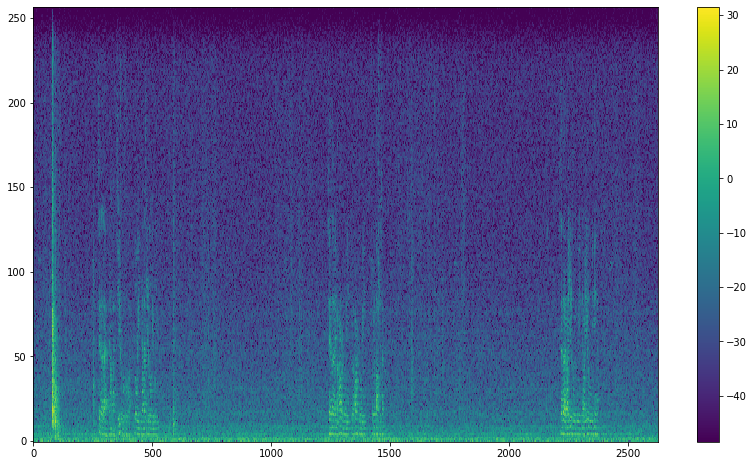

0.5121787060000003


<Figure size 432x288 with 0 Axes>

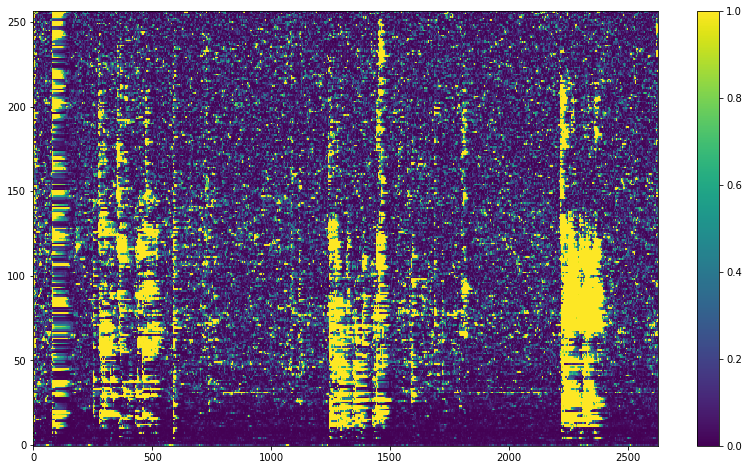

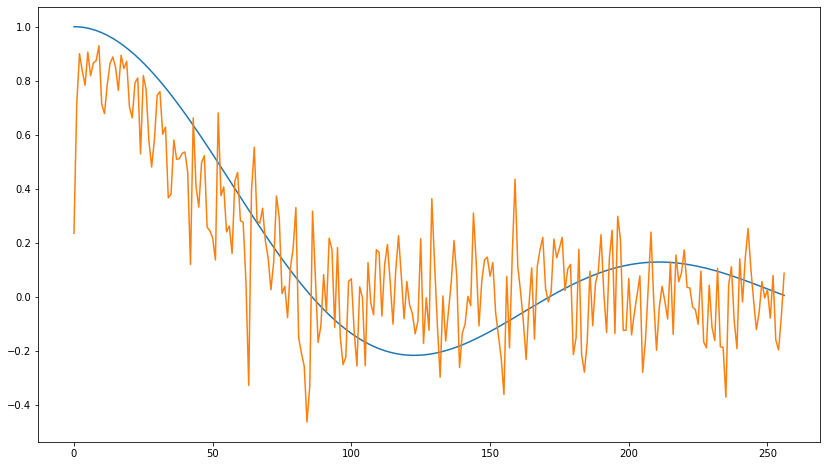

In [6]:


array_data = []
for n in range(2, 6):
    filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/rec1/音轨-{}.wav'.format(n)
    # filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/meeting/1/wav/音轨-{}.wav'.format(n)
    # filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/aioffice/1/ch4/音轨-{}.wav'.format(n)
    # filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/meeting/2/ch4//音轨-{}.wav'.format(n)
    # filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/anechoic/2/ch4/音轨-{}.wav'.format(n)
    # filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/meeting/2/ch4/音轨-{}.wav'.format(n)
    # filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/anechoic/1/ch4/音轨-{}.wav'.format(n)
    # filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/office/1/ch4/音轨-{}.wav'.format(n)
    filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/aioffice/5/ch4/音轨-{}.wav'.format(n)
    data_ch = audioread(filename)
    array_data.append(data_ch)
x = np.array(array_data).T
print(x.shape)
sr = 16000
r = 0.032
c = 343

frameLen = 256
hop = frameLen / 2
overlap = frameLen - hop
nfft = 256
c = 340
r = 0.032
fs = sr

print(x.shape)
channel = x.shape[1]

transform = Transform(n_fft=512, hop_length=256, channel=channel)

D = transform.stft(x)  # [F,T,Ch]
Y, _ = transform.magphase(D, 2)
print(Y.shape)
pmesh(librosa.power_to_db(Y[:, :, -1]))
plt.savefig('pmesh.png')

mcspp = McCDR(nfft=512, channels=4)
# mcspp = McSpp(nfft=512, channels=4)
noise_psd = np.zeros((Y.shape[0], Y.shape[1]))
p = np.zeros((Y.shape[0], Y.shape[1]))
Yout = np.zeros((Y.shape[0], Y.shape[1]), dtype=type(Y))
y = np.zeros(x.shape[0])
fvv = np.zeros(Y.shape[0], dtype=complex)
start = time.process_time()

for n in range(Y.shape[1]):
    p[:, n] = mcspp.estimation(D[:, n, :])

    if n == 2000:
        fvv[:] = mcspp.Gamma_estimator.Fvv_est[:, 0, 2]
    # Yout[:, n] = D[:, n, 0] * omlsa_multi.G

end = time.process_time()
print(end - start)

# y = transform.istft(Yout)

# pmesh(librosa.power_to_db(noise_psd))
# plt.savefig('noise_psd.png')

# pmesh(librosa.power_to_db(np.abs(p)))
# pmesh(((p/(1+p))))
pmesh((np.abs(p)))
# pmesh((librosa.power_to_db(np.abs(1/(1+p)))))
# plt.savefig('p.png')
pt(mcspp.Gamma_estimator.Fvv[:, 0, 2], np.real(fvv))

# plt.plot(y)
# plt.show()

# save audio
# if args.save:
#     wavfile.write('output_omlsa_multi4.wav', 16000, y)